Week 2 Task


1. How can we read and load NIfTI and DICOM files in Python?


2. What is the internal structure and metadata of these formats?

In [2]:
#Using Nibabel to load NIfTI file and analyse the structure of the same
import nibabel as nb

path = r"C:\Users\reeba\Downloads\sub-65304_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii"
file = nb.load(path)
file_data = file.get_fdata()
print(f"Shape : {file_data.shape}")
print(f"Data type: {file_data.dtype}")
print(f"Dimensions: {file_data.ndim}")
print("Total Voxels:", (file_data.shape[0] * file_data.shape[1] * file_data.shape[2])) #X_voxels*Y_voxels*Z_voxels

Shape : (256, 384, 384)
Data type: float64
Dimensions: 3
Total Voxels: 37748736


In [3]:
#Analysing Affine Matrix
affine_matrix = file.affine
print(f"Affine Matrix: {affine_matrix}")

Affine Matrix: [[ 6.29997253e-01  5.55168139e-04  1.25112594e-03 -8.05287628e+01]
 [-6.74987154e-04  6.22265875e-01  5.83925396e-02 -1.00282349e+02]
 [-1.20333256e-03 -5.83937392e-02  6.22264981e-01 -1.19656151e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [4]:
#Using Simpleitk Library 
import SimpleITK as sitk
import numpy as np

image = sitk.ReadImage(path)
print(f"Dimensions: {image.GetSize()}")
image_arr = sitk.GetArrayFromImage(image)
print(f"Metadata: {image.GetMetaDataKeys()}")

Dimensions: (256, 384, 384)
Metadata: ('ITK_FileNotes', 'ITK_original_direction', 'ITK_original_spacing', 'ITK_sform_corrected', 'aux_file', 'bitpix', 'cal_max', 'cal_min', 'datatype', 'descrip', 'dim[0]', 'dim[1]', 'dim[2]', 'dim[3]', 'dim[4]', 'dim[5]', 'dim[6]', 'dim[7]', 'dim_info', 'intent_code', 'intent_name', 'intent_p1', 'intent_p2', 'intent_p3', 'nifti_type', 'pixdim[0]', 'pixdim[1]', 'pixdim[2]', 'pixdim[3]', 'pixdim[4]', 'pixdim[5]', 'pixdim[6]', 'pixdim[7]', 'qfac', 'qform_code', 'qform_code_name', 'qoffset_x', 'qoffset_y', 'qoffset_z', 'qto_xyz', 'quatern_b', 'quatern_c', 'quatern_d', 'scl_inter', 'scl_slope', 'sform_code', 'sform_code_name', 'slice_code', 'slice_duration', 'slice_end', 'slice_start', 'srow_x', 'srow_y', 'srow_z', 'toffset', 'vox_offset', 'xyzt_units')


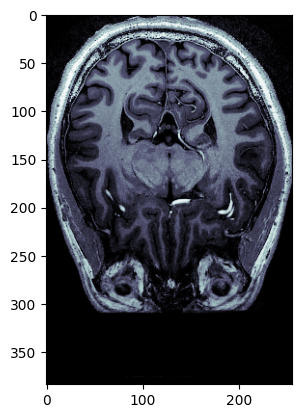

In [19]:
#Analysing slices using matplotlib
import matplotlib.pyplot as plt
slice = image_arr.shape[0] // 2 #Slice exactly in center (this was the clearest obviously)
slice_image = image_arr[slice, :, : ]
plt.imshow(slice_image, cmap="bone")
plt.show()

In [6]:
import os
import pydicom as dicom

# List of folders containing DICOM files
dicom_series_dirs = [f"C:/Users/reeba/Downloads/DICOM/DICOM/ST000000/SE00000{i}" for i in range(3)]

for series_dir in dicom_series_dirs:
    print('Reading From Folder:', os.path.basename(series_dir))

    # List all files in the directory
    dicom_files = os.listdir(series_dir)

    # Pick the first DICOM file
    first_file = dicom_files[0]
    full_path = os.path.join(series_dir, first_file)

    # Read the DICOM file
    dicom_data = dicom.dcmread(full_path, force=True)

    # Display Metadata
    print('Name          :', str(getattr(dicom_data, 'PatientName', 'Unknown')))
    print('Date          :', str(getattr(dicom_data, 'StudyDate', 'Unknown')))
    print('ID            :', str(getattr(dicom_data, 'PatientID', 'Unknown')))
    print('Position      :', getattr(dicom_data, 'ImagePositionPatient', 'Unknown'))
    print('Orientation   :', getattr(dicom_data, 'ImageOrientationPatient', 'Unknown'))
    print('Modality      :', str(getattr(dicom_data, 'Modality', 'Unknown')))
    print('Slice Location Info :', str(getattr(dicom_data, 'SliceLocation', 'Unknown')))
    print('Pixel Spacing (mm)  :', str(getattr(dicom_data, 'PixelSpacing', 'Unknown')))
    print('Slice Thickness     :', str(getattr(dicom_data, 'SliceThickness', 'Unknown')))
    print('Image Height (Rows) :', str(getattr(dicom_data, 'Rows', 'Unknown')))
    print('Image Width (Cols)  :', str(getattr(dicom_data, 'Columns', 'Unknown')))
    print('Pixel Representation:', str(getattr(dicom_data, 'PixelRepresentation', 'Unknown')))
    print('Storage Occupied(bits)      :', str(getattr(dicom_data, 'BitsAllocated', 'Unknown')))
    print('Bits Stored         :', str(getattr(dicom_data, 'BitsStored', 'Unknown')))
    print('Total No of files:', len(dicom_files))
    print('\n' + '-'*60 + '\n')


Reading From Folder: SE000000
Name          : LIONHEART^WILLIAM
Date          : 20150114
ID            : RJN7270540X
Position      : [24.4212673083093, -142.23910105228, 104.601310133934]
Orientation   : [0.00187154288869, 0.98596811294555, 0.16692316532135, -1.6212202899E-4, 0.16692376136779, -0.9859697818756]
Modality      : MR
Slice Location Info : 0.0
Pixel Spacing (mm)  : [0.9765625, 0.9765625]
Slice Thickness     : 10.0
Image Height (Rows) : 256
Image Width (Cols)  : 256
Pixel Representation: 0
Storage Occupied(bits)      : 16
Bits Stored         : 12
Total No of files: 5

------------------------------------------------------------

Reading From Folder: SE000001
Name          : LIONHEART^WILLIAM
Date          : 20150114
ID            : RJN7270540X
Position      : [-123.44543749094, -139.32323336601, -49.273824036121]
Orientation   : [0.99935883283615, -0.0323828160762, 0.01527170091867, 0.03418818861246, 0.98977828025817, -0.1384561806917]
Modality      : MR
Slice Location Info 

3.How do we stack DICOM slices into a 3D volume?

In [7]:
# Helper functions to organize DICOM slices and convert them into a 3D array

def arrange_slices_by_location(dicom_images):
    """Sorts DICOM images based on their spatial slice location."""
    return sorted(dicom_images, key=lambda img: img.SliceLocation)

def stack_slices_into_volume(dicom_stack):
    """Combines a list of 2D DICOM images into a single 3D NumPy array."""
    import numpy as np
    volume = dicom_stack[0].pixel_array  # Start with the first image
    for slice_img in dicom_stack[1:]:
        volume = np.dstack((volume, slice_img.pixel_array))  # Stack along third axis (depth)
    return volume


In [8]:
# Collecting all DICOM files from each series directory into separate lists
first_series_path = dicom_series_dirs[0]
first_series_files = os.listdir(first_series_path)
first_series = [dicom.dcmread(os.path.join(first_series_path, file), force=True) for file in first_series_files]

second_series_path = dicom_series_dirs[1]
second_series_files = os.listdir(second_series_path)
second_series = [dicom.dcmread(os.path.join(second_series_path, file), force=True) for file in second_series_files]

third_series_path = dicom_series_dirs[2]
third_series_files = os.listdir(third_series_path)
third_series = [dicom.dcmread(os.path.join(third_series_path, file), force=True) for file in third_series_files]

# Organizing each series by slice location
sorted_first_series = arrange_slices_by_location(first_series)
sorted_second_series = arrange_slices_by_location(second_series)
sorted_third_series = arrange_slices_by_location(third_series)

# Converting sorted DICOM slices into 3D NumPy arrays
volume_first = stack_slices_into_volume(sorted_first_series)

print(f"3D Volume Shape for First Series: {volume_first.shape}")
print(volume_first)


3D Volume Shape for First Series: (256, 256, 5)
[[[ 8 18 17  8 15]
  [12 24 13 10 13]
  [10 18  3  9  9]
  ...
  [ 5  8 11  8  2]
  [ 9  9  3  7  2]
  [ 5  3 10  3  7]]

 [[ 4  7  3 13  4]
  [13  5  9 12  7]
  [16  2  6  3 14]
  ...
  [ 2 12  5  8  3]
  [ 7  7 11  9  8]
  [ 5  3  9  7 11]]

 [[13  2 15 12  6]
  [18  3 16  9  0]
  [11  3  9  4  7]
  ...
  [ 8  4 18  8 13]
  [10  2 14  7 10]
  [ 6  0  6 12  6]]

 ...

 [[10  2  7  8 10]
  [10  4 10 14  8]
  [ 7 12  8  5  9]
  ...
  [24  5  5  4  5]
  [17  9  5 14  2]
  [ 3  5  9 11  2]]

 [[16  9 13  9  6]
  [13 12 21 10  5]
  [ 7  4 15  3  4]
  ...
  [10 12 10  7  8]
  [14 14 20  8  9]
  [16  4 15  1  7]]

 [[11  9 15 14  7]
  [ 9  9 10  5 15]
  [11  4  9  7 15]
  ...
  [ 6 10  7  2  5]
  [ 8  6 16  2 12]
  [13  4 19  9 14]]]


In [9]:
array_1 = stack_slices_into_volume(sorted_first_series)
print(f"Shape of array_1: {array_1.shape}")
array_2 = stack_slices_into_volume(sorted_second_series)
print(f"Shape of array_2: {array_2.shape}")

Shape of array_1: (256, 256, 5)
Shape of array_2: (256, 256, 27)


4. How can we visualize anatomical planes from a 3D image volume?

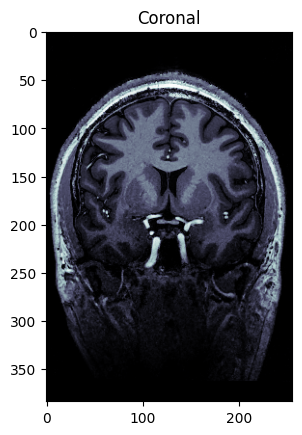

In [10]:
# Extracting the coronal slice by flipping the array along specific axes
coronal_view = image_arr[::-1, image_arr.shape[1] // 2, ::-1]

# Displaying the coronal view slice using a grayscale colormap
plt.imshow(coronal_view, cmap="bone")
plt.title("Coronal")
plt.show()


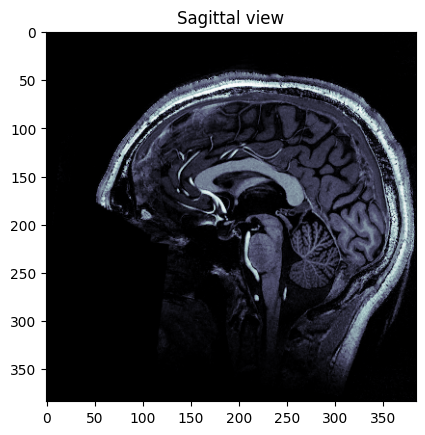

In [11]:
sagittal_view = image_arr[::-1, ::-1, image_arr.shape[2] // 2]
plt.imshow(sagittal_view, cmap="bone")
plt.title('Sagittal view')
plt.show()

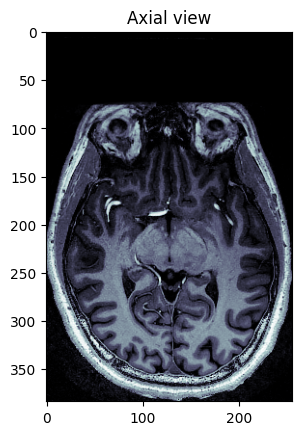

In [12]:
axial_view = image_arr[image_arr.shape[0] // 2, ::-1, ::-1]
plt.imshow(axial_view, cmap="bone")
plt.title('Axial view')
plt.show()

5. How do we interpret image orientation?

Image orientation in NIfTI format follows the RAS (Right, Anterior, Superior) convention. In this system, the X-axis points toward the patient's right side, thY-axis toward the front (anterior) of the body, and the Z-axis upward toward the top (superior) of the head. One important detail to note is that in most standard radiological views, the left side of the image corresponds to the right side of the patient, meaning the patient's left hemisphere of the brain appears on the right side of the displayed scan. This is commonly followed in clinical radiology to maintain consistency. However, in neurological imaging, the convention may be reversed — the left side of the image matches the patient's left, offering a more intuitive view from the clinician's perspective. The affine matrix embedded in the NIfTI file plays a key role by translating voxel indices (i, j, k) into real-world coordinates (x, y, z) in millimeters. This matrix captures the orientation, position, and scaling of the image in physical space, ensuring accurate anatomical localization for analysis, visualization, or image fusion.


6. What are the key differences between DICOM and NIfTI?

DICOM and NIfTI are both used for storing medical images, but they come from different worlds. DICOM is mostly used in hospitals and clinics, and each file usually holds one image slice along with a lot of extra details like patient info, scanner settings, and more. NIfTI, on the other hand, is common in research, especially brain imaging. It keeps things simpler by storing the entire 3D or even 4D image in a single file, along with basic information about how the image sits in space. While DICOM is more detailed, NIfTI is easier to work with when running analyses or building processing workflows.
